In [ ]:
#https://opendata.muis.ee/
#technical scripts

#https://rdflib.readthedocs.io/en/stable/gettingstarted.html#a-more-extensive-example
from rdflib import Graph
# Create a Graph
g = Graph()

# Parse in an RDF file hosted on the Internet
g.parse("http://opendata.muis.ee/object/1887998") 
#g.parse("http://opendata.muis.ee/object/1120182") 

# Loop through each triple in the graph (subj, pred, obj)
#for subj, pred, obj in g:
    #print(subj)
    #print(subj, pred, obj)

# Print the number of "triples" in the Graph
#print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
#print(g.serialize(format='turtle'))

for s, p, o in g:
    print(s, p, o)
    #if "image/" in o: print(s)
    #if "P46_is_composed_of" in p: print(o)

In [ ]:
#getting list of valid URLs into list
from rdflib import Graph
g = Graph()
url = "http://opendata.muis.ee/person-group/"
generallist = []

lst = list(range(100000, 100010))           
for i in lst:
    id = str(i)
    try:
        #g.parse(url + id)
        print(url + id)
        generallist.append(url+id)
    except:
        pass
        #print("error: " + url + id)

In [ ]:
#filtering out values from valid URLs, adding them into two lists
museumlist_url = []
museumlist_names = []


for i in generallist:
    g = Graph()
    g.parse(i)
    for s, p, o in g:
        #print(s, p, o)
        #if "image/" in o: print(s)
        if "rdf-schema#label" in p:  museumlist_url.append(i), museumlist_names.append(o)
        #print(i + " " + o)

In [ ]:
#making dataframe out of list, filtering out only museums
# import pandas as pd
import pandas as pd

df = pd.DataFrame(list(zip(museumlist_url, museumlist_names)))
df = df.rename(columns={0: 'URL',1: 'Name'})
df = df[df['Name'].str.contains("Muuseum")]
df
df.to_excel("museums_list.xlsx")

In [ ]:
#########################################################################################
# Textile collection analysis
#########################################################################################

#http://www.muis.ee/rdf/collection/837
#https://www.muis.ee/museaalview/1887998
#textile collection (Muuseumikogu tekstiil) from Tallinna Linnamuuseum

#idea
#getting list of all objects from collection into list
#getting descriptions from each of objects into dataframe

In [1]:
from rdflib import Graph

g = Graph()
collectionitemslist = []

# Parse in an RDF file 
g.parse("http://www.muis.ee/rdf/collection/837")

#loop through triples
for s, p, o in g:
    if "P46_is_composed_of" in p: collectionitemslist.append(o)
        
#collectionitemslist now contains urls of all items in this particular collection

In [2]:
#filtering out values from valid URLs, adding them into two lists
collectionitemslist_url = []
collectionitemslist_label = []
it = 0

for i in collectionitemslist:
    g = Graph()
    try:
        it += 1
        g.parse(i)
        for s, p, o in g:
            if "rdf-schema#label" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_label.append(o)
    except:
        pass

1
1
1
1
2
2
2
3
3
3
3
4
4
4
5
5
5
5
6
6
6
7
7
7
7
7
8
8
8
9
9
10
10
10
11
11
11
12
12
12
12
13
13
13
13
14
14
15
15
15
15
15
15
16
16
16
17
17
17
18
18
18
18
19
19
19
20
20
20
21
21
21
22
22
22
23
23
24
24
24
25
25
25
26
26
26
26
27
27
27
27
28
28
28
29
29
29
29
30
30
30
30
31
31
31
32
32
32
32
33
33
33
34
34
34
35
35
35
36
36
36
37
37
37
37
38
38
38
39
39
39
39
40
40
40
41
41
41
41
42
42
42
42
43
43
43
44
44
44
45
45
45
46
46
46
46
46
47
47
47
47
48
48
48
48
48
49
49
49
50
50
50
50
50
51
51
51
51
52
52
52
53
53
53
54
54
54
55
55
55
55
56
56
56
56
57
57
57
57
58
58
58
59
59
59
60
60
60
60
61
61
61
61
62
62
62
63
63
64
64
64
65
65
65
66
66
66
67
67
67
67
67
68
68
68
69
69
69
69
70
70
70
71
71
71
72
72
72
72
72
73
73
73
73
74
74
74
75
75
75
75
76
76
76
77
77
77
78
78
78
79
79
79
80
80
80
80
80
81
81
82
82
82
82
83
83
83
84
84
84
84
85
85
85
86
86
86
87
87
87
88
88
88
88
88
89
89
89
89
90
90
90
90
91
91
91
91
92
92
93
93
93
94
94
94
95
95
95
95
96
96
96
97
97
97
98
98
98
99
99
99
100
100


638
638
638
639
639
639
639
640
640
640
641
641
641
642
642
642
643
643
643
644
644
644
644
645
645
645
645
645
646
646
646
647
647
647
647
647
648
648
648
649
649
649
649
650
650
650
651
651
651
652
652
652
652
653
653
653
654
654
654
654
655
655
655
656
656
656
657
657
657
657
658
658
658
658
659
659
659
660
660
660
661
661
661
661
662
662
662
662
663
663
663
664
664
664
665
665
665
665
666
666
666
667
667
667
668
668
668
669
669
669
670
670
670
670
671
671
671
672
672
672
672
672
672
673
673
673
674
674
674
675
675
675
675
675
676
676
676
676
677
677
677
678
678
678
679
679
679
680
680
680
681
681
681
681
681
681
682
682
682
683
683
683
684
684
684
685
685
685
686
686
686
687
687
687
687
688
688
688
689
689
689
690
690
690
691
691
691
692
692
692
692
693
693
693
694
694
694
695
695
695
696
696
696
696
697
697
697
698
698
698
699
699
699
699
700
701
701
701
702
702
702
703
703
703
703
704
704
704
705
705
705
706
706
706
707
707
707
707
707
708
708
708
709
709
709
710
710
710
710
711


1191
1191
1191
1192
1192
1192
1193
1193
1193
1193
1193
1194
1194
1194
1194
1195
1195
1195
1196
1196
1196
1196
1197
1197
1198
1198
1198
1199
1200
1200
1200
1201
1201
1201
1202
1202
1202
1203
1203
1203
1203
1204
1204
1204
1205
1205
1205
1206
1206
1206
1207
1207
1207
1208
1208
1208
1209
1209
1209
1210
1210
1210
1211
1211
1211
1211
1212
1212
1212
1213
1213
1213
1213
1214
1214
1214
1214
1215
1215
1215
1215
1215
1216
1216
1216
1216
1216
1217
1217
1217
1217
1218
1218
1218
1218
1219
1219
1219
1220
1220
1220
1220
1221
1221
1221
1221
1221
1222
1222
1222
1222
1223
1223
1223
1224
1224
1224
1225
1225
1225
1227
1227
1227
1228
1228
1228
1228
1229
1229
1229
1229
1230
1230
1230
1231
1231
1231
1232
1232
1232
1233
1233
1233
1233
1234
1234
1234
1235
1235
1235
1235
1236
1236
1236
1237
1237
1237
1238
1238
1238
1239
1239
1239
1239
1240
1240
1240
1241
1241
1241
1242
1242
1242
1243
1243
1243
1244
1244
1244
1245
1245
1245
1246
1246
1246
1247
1247
1247
1248
1248
1248
1248
1249
1249
1249
1250
1250
1250
1251
1251


1679
1679
1679
1679
1680
1680
1680
1681
1681
1681
1682
1682
1682
1683
1683
1683
1683
1684
1684
1684
1684
1685
1685
1685
1685
1686
1686
1686
1687
1687
1687
1688
1688
1688
1688
1689
1689
1689
1690
1690
1690
1691
1691
1691
1691
1691
1692
1692
1692
1693
1693
1693
1694
1694
1694
1695
1695
1695
1695
1696
1696
1696
1697
1697
1697
1698
1698
1698
1699
1699
1699
1700
1700
1700
1701
1701
1701
1702
1702
1702
1703
1703
1703
1703
1704
1704
1704
1704
1705
1705
1705
1706
1706
1706
1707
1707
1707
1708
1708
1708
1708
1709
1709
1709
1709
1710
1710
1710
1711
1711
1711
1711
1712
1712
1712
1713
1713
1713
1714
1714
1714
1715
1715
1715
1715
1716
1716
1716
1716
1716
1717
1717
1717
1718
1718
1718
1718
1718
1719
1719
1719
1719
1720
1720
1720
1721
1721
1721
1721
1722
1722
1722
1723
1723
1723
1724
1724
1724
1725
1725
1726
1726
1726
1727
1727
1727
1728
1728
1728
1729
1729
1729
1730
1730
1730
1731
1732
1732
1732
1732
1733
1733
1733
1733
1734
1734
1734
1735
1735
1735
1736
1736
1736
1737
1737
1737
1737
1738
1738
1738


2171
2171
2171
2171
2172
2172
2173
2173
2173
2174
2174
2174
2175
2175
2175
2176
2176
2176
2177
2177
2178
2178
2178
2178
2178
2178
2179
2179
2179
2179
2180
2180
2181
2181
2181
2182
2182
2182
2183
2183
2183
2184
2184
2184
2184
2185
2185
2185
2186
2186
2186
2187
2187
2187
2188
2188
2188
2189
2189
2189
2190
2190
2190
2190
2190
2191
2191
2192
2192
2192
2193
2193
2193
2193
2194
2194
2194
2195
2195
2195
2196
2196
2196
2197
2197
2197
2198
2198
2198
2198
2198
2199
2199
2199
2199
2200
2200
2200
2200
2201
2201
2201
2202
2202
2202
2202
2203
2203
2203
2204
2204
2204
2205
2205
2205
2206
2206
2206
2207
2207
2207
2208
2208
2208
2209
2209
2209
2209
2209
2210
2210
2211
2211
2211
2211
2212
2212
2212
2212
2213
2213
2214
2214
2214
2214
2215
2215
2215
2216
2216
2216
2217
2217
2217
2218
2218
2218
2219
2219
2219
2220
2220
2221
2221
2221
2221
2222
2222
2222
2223
2223
2223
2223
2224
2224
2224
2224
2225
2225
2225
2225
2226
2226
2226
2226
2226
2227
2227
2227
2227
2228
2228
2228
2229
2229
2229
2230
2230
2230
2231


2650
2650
2650
2651
2651
2651
2652
2652
2652
2652
2653
2653
2653
2654
2654
2654
2655
2655
2655
2655
2655
2656
2656
2657
2657
2657
2657
2658
2658
2658
2659
2659
2659
2660
2660
2660
2661
2661
2662
2662
2662
2663
2663
2663
2664
2664
2664
2665
2665
2665
2666
2666
2666
2667
2667
2667
2668
2668
2668
2668
2668
2669
2669
2669
2670
2670
2670
2671
2671
2671
2672
2672
2672
2673
2673
2673
2674
2674
2674
2675
2675
2675
2676
2676
2676
2677
2677
2677
2677
2678
2678
2678
2679
2679
2679
2680
2680
2680
2681
2681
2681
2682
2682
2682
2683
2683
2683
2683
2683
2684
2684
2684
2685
2685
2685
2685
2686
2686
2686
2687
2687
2687
2688
2688
2688
2689
2689
2689
2690
2690
2690
2691
2691
2691
2692
2692
2692
2693
2693
2693
2693
2694
2694
2694
2694
2695
2695
2695
2695
2695
2696
2696
2696
2697
2697
2697
2697
2698
2698
2698
2699
2699
2699
2699
2700
2700
2700
2701
2701
2701
2702
2702
2702
2704
2704
2704
2705
2705
2706
2706
2706
2706
2707
2707
2707
2707
2707
2708
2708
2708
2709
2709
2709
2710
2710
2710
2711
2711
2711
2712


3138
3138
3138
3139
3139
3139
3140
3140
3140
3140
3140
3141
3141
3141
3142
3142
3142
3143
3143
3143
3144
3144
3144
3145
3145
3145
3146
3146
3146
3147
3147
3147
3148
3148
3148
3149
3149
3149
3149
3150
3150
3150
3151
3151
3151
3152
3152
3152
3152
3153
3153
3153
3153
3154
3154
3154
3154
3154
3155
3155
3155
3156
3156
3156
3156
3157
3157
3157
3158
3158
3158
3159
3159
3159
3160
3160
3160
3160
3161
3161
3161
3162
3162
3162
3162
3162
3163
3163
3163
3164
3164
3164
3165
3165
3165
3165
3166
3166
3166
3167
3168
3168
3168
3169
3169
3169
3169
3169
3169
3169
3170
3170
3170
3171
3171
3171
3172
3172
3172
3173
3173
3173
3174
3174
3174
3175
3175
3175
3176
3176
3176
3177
3177
3177
3178
3178
3178
3179
3179
3179
3180
3180
3180
3181
3181
3181
3181
3182
3182
3182
3182
3183
3183
3183
3184
3184
3184
3185
3185
3185
3185
3186
3186
3186
3187
3187
3187
3188
3188
3188
3189
3189
3189
3189
3190
3190
3190
3191
3191
3191
3192
3192
3192
3193
3193
3193
3194
3194
3194
3194
3195
3195
3195
3196
3196
3196
3197
3197
3197
3198


3626
3626
3626
3627
3627
3627
3628
3628
3628
3628
3629
3629
3629
3630
3630
3630
3630
3631
3631
3631
3631
3632
3632
3632
3633
3633
3633
3634
3634
3634
3634
3635
3635
3635
3636
3636
3636
3637
3637
3637
3637
3638
3638
3638
3638
3638
3638
3639
3639
3639
3639
3640
3640
3640
3640
3641
3641
3641
3642
3642
3642
3642
3643
3643
3643
3643
3643
3644
3644
3644
3644
3645
3645
3645
3646
3646
3646
3647
3647
3647
3648
3648
3648
3649
3649
3649
3649
3650
3650
3650
3651
3651
3651
3652
3652
3652
3653
3653
3653
3654
3654
3654
3655
3655
3655
3656
3656
3656
3657
3657
3657
3658
3658
3658
3658
3658
3658
3659
3659
3659
3659
3660
3660
3660
3661
3661
3661
3662
3662
3662
3663
3663
3663
3664
3664
3664
3665
3665
3665
3665
3665
3666
3666
3666
3666
3667
3667
3667
3668
3668
3668
3669
3669
3669
3669
3670
3670
3670
3671
3671
3671
3672
3672
3672
3672
3673
3673
3673
3674
3674
3674
3675
3675
3675
3676
3676
3676
3676
3677
3677
3677
3678
3678
3679
3679
3679
3679
3679
3680
3680
3680
3681
3681
3681
3682
3682
3682
3683
3683
3683


In [8]:
#making dataframe out of lists
# import pandas as pd
import pandas as pd

df = pd.DataFrame(list(zip(collectionitemslist_url, collectionitemslist_label)))
df = df.rename(columns={0: 'URL',1: 'Label'})
df = df[df['Label'].str.contains("tervik") == False]  #filtering out values with "tervik"
df = df.replace(' ja ', ' ', regex=True) #removing not to skew the outcomes
df = df.replace(' ning ', ' ', regex=True) #removing not to skew the outcomes

#df.to_excel("C:/Temp/textile_col_labels.xlsx")

In [9]:
#https://github.com/amueller/word_cloud/blob/main/examples/simple.py

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

#additional filtering for temp scope reduce
#df = df[df['Label'].str.contains("Kleit")]  #!!!!
#creating a single string with all values from Label column
df_joined = ' '.join(df['Label'].to_list())

#df_joined = 'Kleit, õmmeldud valgest margisetist, Kleit pikkade kimono varrukatega Kleit Kleit Kleit Kleit KleitKleit Kleit'
#would actually also need to do some: cleansing, lemmisation, tokenisation

In [10]:
df_joined

'Lõuendist, siniseks värvitud, kahe poolega. Ristkülikukujulise pinna keskel kollasel krooniga vapil kolm lõvi, kroonid peas. Lipp kinnitatud varda külge 28 vasknaelaga. Lipuvarras Lipp lipuvarras. Tallinna raesõdurite kompanii Päevavari Päevavari, valgest tüllist, batistist siidist voodriga, paelapitsi motiividega; puust varrega. T-särk õmmeldud puuvillasest trikoost, meremehesinine kitsa valge triibuga kaelusel, V-kaelus, lühikesed varrukad, suurus XL. Seljal valge tekst: "Mina olen eurooplane". T-särk "Mina olen eurooplane" Mina olen eurooplane Lipp. Tallinna linn Lipp õmmeldud valge-helesinisetriibulisest villasest riidest. Lipu ääred palistatud masinaõmblusega, vardapoolses otsas punutud linane nöör lipu kinnitamiseks. Vimpel "RAHVATANTSUPIDU EESTI NSV XXX AASTAPÄEV" Vimpel puuvillasest riidest, kolmnurga kujuline, põhivärvilt punane. Ülal musta valgega trükitud nelinurkne rahvatantsupeo märgi kujutis (tantsiva mehe naise siluetid, äärekiri "RAHVATANTSUPIDU EESTI NSV XXX AASTAPÄEV

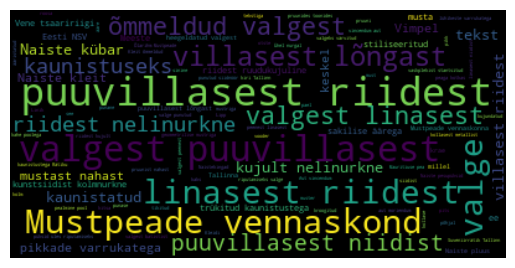

In [13]:
#generating world cloud

import matplotlib.pyplot as plt
# lower max_font_size
wordcloud = WordCloud(max_font_size=80).generate(df_joined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()